In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [5]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Jakie są najpopularniejsze tytuły filmów ?

In [7]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
She                     11
Maya                    11
Blood Money             11
The Outsider            11
Honeymoon               10
Love                    10
Name: title, dtype: int64

### W których latach dekady 1930-39 wyprodukowano najwięcej filmów?

In [9]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1185
1936    1127
1938    1115
Name: year, dtype: int64

### Wydrukuj liczbę filmów (wykres słupkowy), które wyprodukowano w poszczególnych dekadach historii kina.

In [3]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

NameError: name 'titles' is not defined

### Wydrukuj liczbę filmów "Hamlet" wyprodukowanych w poszczególnych dekadach

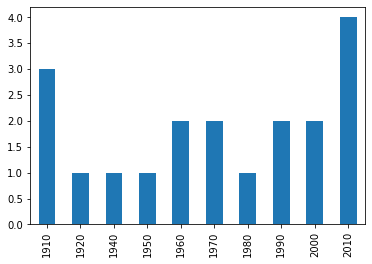

In [13]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Wydrukuj liczbę ról "Rustler" w każdej dekadzie historii kina.

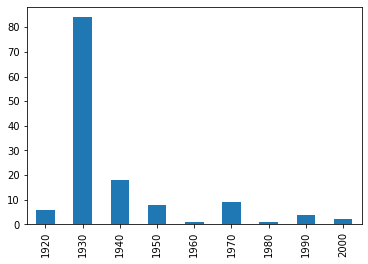

In [15]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Wydrukuj liczbę ról "Hamlet" w każdej dekadzie historii kina.

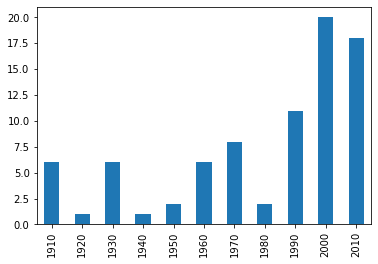

In [17]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Jakie są najczęściej obsadzane role w historii kina?

In [18]:
cast.character.value_counts().head(11)

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

### Wylistuj 10 osób, które najczęściej występowały w obsadzie jako "Herself"?

In [20]:
c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Mary Jo Pehl           7
Joan Rivers            7
Marilyn Monroe         5
Chris Evert            5
Juhi Chawla            5
Kareena Kapoor         5
Bunny Yeager           5
Name: name, dtype: int64

### Wylistuj 10 osób, które najczęściej występowały w obsadzie jako "Himself"?

In [21]:
c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
George W. Bush           20
Bill Clinton             20
Winston Churchill        20
Franklin D. Roosevelt    20
Martin Luther King       19
Name: name, dtype: int64

### Którzy aktorzy lub aktorki pojawiali się najczęściej w filmach w roku 1945?

In [22]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       28
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Pierre Watkin       24
Edmund Cobb         24
Franklyn Farnum     24
Charles Sullivan    24
Name: name, dtype: int64

### Którzy aktorzy lub aktorki pojawiali się najczęściej w filmach w roku 1985?

In [23]:
cast[cast.year == 1985].name.value_counts().head(10)

Shakti Kapoor     19
Mammootty         17
Sukumari          16
Lou Scheimer      15
Aruna Irani       14
Mohanlal          13
Deven Verma       13
Raj Babbar        13
Rajesh Khanna     13
Pinchoo Kapoor    12
Name: name, dtype: int64

### Wydrukuj ile ról w każdym roku swojej kariery grał Mammootty (wykres liniowy).

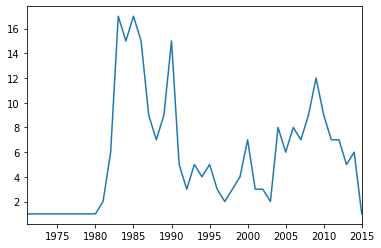

In [24]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### Wylistuj 10 ról, które najczęściej zaczynały się od frazy "Patron in"?

In [26]:
c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in restaurant             3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### Wylistuj 10 ról, które najczęściej zaczynały się od frazy "Science"?

In [28]:
c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         53
Science Fair Student     8
Science Student          8
Science Fair Judge       6
Science Reporter         5
Science Club Member      5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science Officer          3
Name: character, dtype: int64

### Wydrukuj wartości "n" ról, które Judi Dench grała w trakcie swojej kariery.

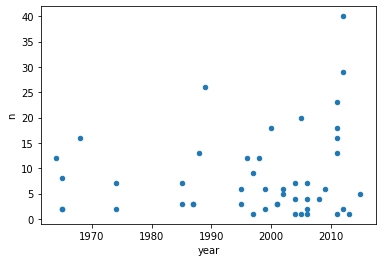

In [31]:
c = cast
c = c[c.name == 'Judi Dench'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Wydrukuj wartości "n" ról, które Cary Grant grał w trakcie swojej kariery.

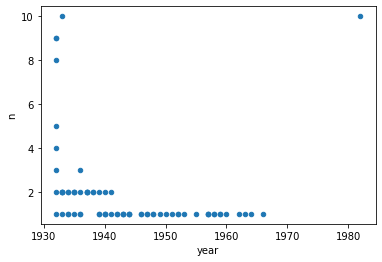

In [34]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Wydrukuj wartości "n" ról, które Sidney Poitier grał w trakcie swojej kariery.

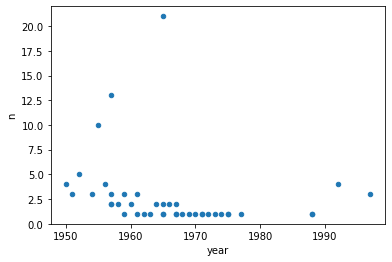

In [35]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Ile ról pierwszoplanowych (n=1) było dostępnych dla aktorów, a ile dla aktorek w latach 1950-59?

In [36]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6375
actress    2813
Name: type, dtype: int64

### Ile ról drugoplanowych (n=2) było dostępnych dla aktorów, a ile dla aktorek w latach 1950-59?

In [37]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actress    4399
actor      4377
Name: type, dtype: int64

# Koniec części drugiej